# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
import sys
%load_ext autoreload
%autoreload 2
%matplotlib inline
!{sys.executable} -m pip install wandb
!pip -q install ./python

    100% |████████████████████████████████| 1.3MB 15.5MB/s ta 0:00:01
    100% |████████████████████████████████| 460kB 24.0MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 26.3MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 20.7MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 19.5MB/s ta 0:00:01
    100% |████████████████████████████████| 102kB 24.9MB/s a 0:00:01
    100% |████████████████████████████████| 71kB 20.7MB/s ta 0:00:01
    100% |████████████████████████████████| 256kB 22.4MB/s ta 0:00:01
    100% |████████████████████████████████| 184kB 21.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for nvidia-ml-py3 ... done
  Stored in directory: /root/.cache/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
  Running setup.py bdist_wheel for shortuuid ... done
  Stored in directory: /root/.cache/pip/wheels/3f/eb/fd/69e5177f67b505e44acbd1aedfbe44b91768ee0c4cd5636576
  Running setup.py bdist_wheel for gql ... done
 

load packages

In [2]:
import os
sys.path.append('files')

import torch
from datetime import datetime
def get_time(): return datetime.now().strftime("%Y-%d-%d_%H-%M-%S")
from collections import deque
import matplotlib.pyplot as plt

[autoreload of prompt_toolkit failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 368, in superreload
    module = reload(module)
  File "/opt/conda/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/opt/conda/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/opt/conda/lib/python3.6/site-packages/prompt_toolkit/__init__.py", line 19, in <module>
    from .formatted_text import ANSI, HTML
  File "/opt/conda/lib/python3.6/site-packages/prompt_toolkit/formatted_text/__init_

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [3]:
os.listdir('/data/Reacher_Linux_NoVis')

['Reacher.x86', 'Reacher_Data', 'Reacher.x86_64']

In [4]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

#select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


.    
.  
.  
.  
.  
.  
.  
.  
.  
.  
  
# PROJECT 2: CONTINUOUS CONTROL!
This project/report explains briefly, (together with the comments in the code) how to solve the Continuous control problem of Udacity's Deep Reinforcement Learning Nanodegree Program.  
In this project we've to train an agent to move a double-jointed arm to a desired location. The agent receives a reward of +0.1 for each step that the agent's hand is in the desired location. Thus, the goal of the agent is to maintain its position at the target location for as many time steps as possible. Last but not least, in this project we'll make use of 20 identical agents which are trained simultaneously, whereby each againt contains its own copy of the environment.  

### Which kind of problem? 
Both state and action spaces are continuous, therefore we can make use of one of the next algorithms:
- PPO
- A3C
- DDPG
- D4PG

But for this project, we'll choose DDPG. Why? it is very related with the DQNs network. It seems to perform better then PPO and A3C. Able to be trained with multiple agents.


### DDPG

1) Environemnt: Reset the environment and provide an initial state.  
2) Agent: Given a state, ask the agent which action it would perform  
2.1) Provide the current state to the agents `local actor network` and receive an vector with length 4 back where values are between -1 and 1  
3) Environemnt: perform the step, suggested by the agent.  
3.1) receive a new state, reward and a done value  
4) Agent: Perform a step  
4.1) Add the state(s) to the memory buffer  
4.2) If there are enough data samples for creating a batch, we can train our networks  
4.2.1) get a batch (states, actions, rewards, next_states, dones)  
4.2.2) Predicted next-actions from the `actor_target network` (given next_state) and Q-values from `critic_target network`    (given next_states and next-actions)  
4.2.3) Compute Q targets = rewards + (gamma * Q_targets_next * (1 - dones))  
4.2.4) Compute the critic (MSE) loss between `Q expected` (result if `critic_local(states, actions)`) and `Q_targets`  
4.2.5) Minimize the losses  
4.2.6) slowly update target networks
5) Store the rewards and go to step 2 or quite when an agents is done :)  
  
  

## Actor

The Actor maps each state of the environment to an action, which is a vector of four numbers between -1 and +1. The network consists of three fully-connected linear layers with ReLU activation functions. The output layer uses the tanh activation function to produce values between -1 and +1 for each of the four outputs. 

The task of the actor is to approximate the optimal policiy, deterministically. This means that we always want to output the best believed action for any given state. 


![](images/nn_actor.png)

## Critic

The Critic maps a state and action to a Q-value, which reflects the estimated quality of the given action in the given state. The network consists of three fully-connected linear layers with ReLU activation functions. The output layer produces the estimated value of the given action in the given state.  
    
The task of the Critic here is to approximate the maximizer over the Q values of the next state and not as a learned baseline.  
The Critic learns to evaluate the optimal value function by using the actors best believe action.



![](images/nn_critic.png)

### learn

**4 networks**
- actor_local   
- actor_target  
  
- critic_local  
- critic_target  

**Gradient descent networks**
- actor_local
- critic_local
  
**Slow update networks, via Tau**
- actor_target
- critic_target
  
**Network which decides the next step**
- actor_local
  
**Learn step**
  
Grep a single Batch
~~~~python
        GAMMA = 0.99
        experiences = memory.sample()

        # Unpack a single batch 
        states, actions, rewards, next_states, dones = experiences
~~~~

Calculate the Q-target. This is done via the **target**-actor-network and **target**-critic-network whereby we feed the outcome of the **target**-actor-network in the **target**-critic-network, which results in a **Q-target-next** value.   
   
Via the the **Q-target-next** value, we can calculate the **Q-target**.  

 ~~~~python
        # ---------------------------- update critic ---------------------------- #
        # Get predicted next-state actions and Q values from target models
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        
        # Compute Q targets for current states (y_i)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
~~~~
Use the **critic_local**-network with the **state** and **action** to calculate the MSE loss, with the **Q-target** (which were more based on the **Next-state**.

~~~~python
        # Compute critic loss
        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
~~~~

Perform the gradient descent on the **critic-local-network**
~~~~python
        # Minimize the loss
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()
~~~~
Calculate the **actor-local** loss
~~~~python
        # ---------------------------- update actor ---------------------------- #
        # Compute actor loss
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
~~~~

Perform the gradient descent on the **actor-local-network**
~~~~python
        # Minimize the loss
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()
~~~~

Soft update the **actor-target-network** and **cretig-target-network**, via the hyper parameter TAU
~~~~python
        # ----------------------- update target networks ----------------------- #
        self.soft_update(self.critic_local, self.critic_target, self.TAU)
        self.soft_update(self.actor_local, self.actor_target, self.TAU)  
~~~~       

### login with wandb
A tool which keep track of the performance and hyperparameters

In [7]:
os.popen('wandb login b4325006fxxxxxxxxxxxxxxxxx').read()
import wandb

# hyper parameters


 - lr_actor : learning rate of the actor
 - lr_critic : learning rate of the critic 
 - gamma : discount factor
 - weight_decay : L2 weight decay for the critic
 - tau : parameter for soft update of target parameters
 - learn_interval : learning interval 
 - learn_num : Amount of batches which we would like to learn (one after the other)
 - batch_size : number of episodes which we would like to use to train
 - buffer_size : number of episodes from which we can can sample of


In [8]:
import json
with open('hyper_parameters.json') as json_file:
    hyper_parameters = json.load(json_file)

# show the parameters
hyper_parameters

{'random_seed': 0,
 'learn_interval': 6,
 'learn_num': 1,
 'lr_actor': 0.001,
 'lr_critic': 0.001,
 'gamma': 0.99,
 'weight_decay': 0,
 'tau': 0.0015,
 'batch_size': 512,
 'buffer_size': 100000}

# Agent

In [9]:
from agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, num_agents = 20, **hyper_parameters)

# Add the config to wandb    
wandb.init(config=agent.__dict__,project="udacity_deep-reinforcement-learning_project-2")
wandb.watch(agent.actor_local)
wandb.watch(agent.critic_local)

INFO:wandb.run_manager:system metrics and metadata threads started
INFO:wandb.run_manager:checking resume status, waiting at most 10 seconds
INFO:wandb.run_manager:resuming run from id: UnVuOnYxOmlyeG56N3FhOnVkYWNpdHlfZGVlcC1yZWluZm9yY2VtZW50LWxlYXJuaW5nX3Byb2plY3QtMjp2ZXJiZWVtZW4=
INFO:wandb.run_manager:upserting run before process can begin, waiting at most 10 seconds
INFO:wandb.run_manager:saving patches
INFO:wandb.run_manager:saving pip packages
INFO:wandb.run_manager:initializing streaming files api
INFO:wandb.run_manager:unblocking file change observer, beginning sync with W&B servers


INFO:wandb.run_manager:shutting down system stats and metadata service
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/config.yaml
INFO:wandb.run_manager:file/dir created: /home/workspace/wandb/run-20191123_174521-irxnz7qa/requirements.txt
INFO:wandb.run_manager:file/dir created: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir created: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir created: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir created: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir created: /home/workspace/wandb/run-20191123_174521-irxnz7qa/code/Continuous_Control.ipynb
INFO:wandb.run_manager:file/dir created: /home/workspace/wandb/run-20191123_174521-irxnz7qa/code
INFO:wandb.run_manager:stopping streaming files an

# Train

In [10]:
def run_ddpg(n_episodes = 250, max_t=1000, print_every=100, save_every=100, checkpoint_name=f'checkpoint_{get_time()}'):
    
    scores_deque = deque(maxlen=print_every)
    scores = []
    
    # for each episode
    for i_episode in range(1, n_episodes+1):
        
        # start a new episode
        environment_info = env.reset(train_mode=True)[brain_name]
        states = environment_info.vector_observations
        agent.reset()
        score = np.zeros(num_agents)
        
        # for max t steps in the episde
        for t in range(max_t):
            
            # get the actions from the agent, given a state
            actions = agent.action(states)
    
            
            # perform the action & receive the next state, reward and done
            env_info = env.step(actions)[brain_name]           
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
 
            # learn if the critereia are met
            agent.step(t, states, actions, rewards, next_states, dones)
            
            # prepare next state + save results
            states = next_states      
            score += rewards
            
            # if any of the agents is done, we stop :) 
            if np.any(dones):
                break
                
        # store the scores | Log
        mean_score = np.mean(score)
        
        # add to the queue
        scores_deque.append(mean_score)
        scores.append(mean_score)
        
        # show logs
        avg_score = np.mean(scores_deque)
        wandb.log({"Average Score": avg_score, "Mean Score": mean_score})
        
        print(f'\rEpisode {i_episode}\tAverage Score: {np.around(avg_score,3)}, score: {np.around(mean_score,3)}', end="")
        
        
   
        if i_episode % save_every == 0:
            agent.save_agent(f'{checkpoint_name}_{i_episode}')
        

        if i_episode % print_every == 0 or avg_score >= 30:
            print(f'\rEpisode {i_episode}\tAverage Score: {np.around(avg_score,3)}, score: {np.around(mean_score,3)}')
        
        if avg_score >= 31.0:
            print(f'\r\nEnvironment is solved Episode {i_episode}\tAverage Score: {np.around(avg_score,3)}, score: {np.around(mean_score,3)}')
            agent.save_agent(f'{checkpoint_name}_{i_episode}')
            break
            
    return scores

scores = run_ddpg()

INFO:wandb.run_manager:system metrics and metadata threads started
INFO:wandb.run_manager:checking resume status, waiting at most 10 seconds
INFO:wandb.run_manager:resuming run from id: UnVuOnYxOmlyeG56N3FhOnVkYWNpdHlfZGVlcC1yZWluZm9yY2VtZW50LWxlYXJuaW5nX3Byb2plY3QtMjp2ZXJiZWVtZW4=
INFO:wandb.run_manager:upserting run before process can begin, waiting at most 10 seconds
INFO:wandb.run_manager:saving patches
INFO:wandb.run_manager:saving pip packages
INFO:wandb.run_manager:initializing streaming files api
INFO:wandb.run_manager:unblocking file change observer, beginning sync with W&B servers
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/requirements.txt
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run

Episode 1	Average Score: 0.447, score: 0.447

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 2	Average Score: 0.44, score: 0.433

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 3	Average Score: 0.517, score: 0.67

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 4	Average Score: 0.503, score: 0.464

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 6	Average Score: 0.398, score: 0.14

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 7	Average Score: 0.373, score: 0.223

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 8	Average Score: 0.352, score: 0.202

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 9	Average Score: 0.324, score: 0.1

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 10	Average Score: 0.322, score: 0.306

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 11	Average Score: 0.368, score: 0.826

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 12	Average Score: 0.427, score: 1.083

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 13	Average Score: 0.461, score: 0.861

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 14	Average Score: 0.513, score: 1.198

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 15	Average Score: 0.568, score: 1.326

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 16	Average Score: 0.618, score: 1.371

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 17	Average Score: 0.664, score: 1.405

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 19	Average Score: 0.742, score: 1.518

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 20	Average Score: 0.768, score: 1.27

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 21	Average Score: 0.787, score: 1.155

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 22	Average Score: 0.816, score: 1.43

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 23	Average Score: 0.844, score: 1.455

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 24	Average Score: 0.853, score: 1.07

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 25	Average Score: 0.884, score: 1.622

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 26	Average Score: 0.915, score: 1.698

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 27	Average Score: 0.941, score: 1.611

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 28	Average Score: 0.975, score: 1.9

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 29	Average Score: 1.005, score: 1.838

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 30	Average Score: 1.042, score: 2.121

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 31	Average Score: 1.096, score: 2.697

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 32	Average Score: 1.136, score: 2.399

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 33	Average Score: 1.193, score: 2.991

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 34	Average Score: 1.273, score: 3.939

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 35	Average Score: 1.368, score: 4.589

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 36	Average Score: 1.497, score: 6.002

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 38	Average Score: 1.898, score: 9.946

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 39	Average Score: 2.116, score: 10.42

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 40	Average Score: 2.35, score: 11.446

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 41	Average Score: 2.605, score: 12.831

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 42	Average Score: 2.862, score: 13.368

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 43	Average Score: 3.236, score: 18.954

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 44	Average Score: 3.542, score: 16.726

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 45	Average Score: 3.901, score: 19.686

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 46	Average Score: 4.235, score: 19.27

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 47	Average Score: 4.59, score: 20.916

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 48	Average Score: 4.968, score: 22.739

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 49	Average Score: 5.306, score: 21.539

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 50	Average Score: 5.701, score: 25.058

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 51	Average Score: 6.071, score: 24.555

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 52	Average Score: 6.467, score: 26.631

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 53	Average Score: 6.807, score: 24.499

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 54	Average Score: 7.208, score: 28.466

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 55	Average Score: 7.587, score: 28.083

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 56	Average Score: 7.958, score: 28.352

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 57	Average Score: 8.32, score: 28.569

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 58	Average Score: 8.661, score: 28.127

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 59	Average Score: 9.007, score: 29.077

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 60	Average Score: 9.443, score: 35.164

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 61	Average Score: 9.844, score: 33.907

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 62	Average Score: 10.27, score: 36.224

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 63	Average Score: 10.681, score: 36.199

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 64	Average Score: 11.091, score: 36.876

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 65	Average Score: 11.493, score: 37.207

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 66	Average Score: 11.878, score: 36.955

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 67	Average Score: 12.26, score: 37.466

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 68	Average Score: 12.616, score: 36.458

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 69	Average Score: 12.976, score: 37.474

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 71	Average Score: 13.654, score: 36.982

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 72	Average Score: 13.978, score: 36.948

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 73	Average Score: 14.299, score: 37.428

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 74	Average Score: 14.611, score: 37.361

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 75	Average Score: 14.92, score: 37.77

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 76	Average Score: 15.218, score: 37.561

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 77	Average Score: 15.503, score: 37.176

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 78	Average Score: 15.782, score: 37.28

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 79	Average Score: 16.055, score: 37.345

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 80	Average Score: 16.321, score: 37.316

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 81	Average Score: 16.574, score: 36.822

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 82	Average Score: 16.832, score: 37.739

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 83	Average Score: 17.077, score: 37.153

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 84	Average Score: 17.314, score: 37.033

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 85	Average Score: 17.548, score: 37.198

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 86	Average Score: 17.779, score: 37.398

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 87	Average Score: 18.006, score: 37.493

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 88	Average Score: 18.224, score: 37.266

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 89	Average Score: 18.433, score: 36.792

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 90	Average Score: 18.639, score: 37.005

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 91	Average Score: 18.847, score: 37.511

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 92	Average Score: 19.044, score: 37.025

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 93	Average Score: 19.242, score: 37.44

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 94	Average Score: 19.434, score: 37.238

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 95	Average Score: 19.625, score: 37.562

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 96	Average Score: 19.806, score: 37.081

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 97	Average Score: 19.99, score: 37.61

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 98	Average Score: 20.162, score: 36.827

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 99	Average Score: 20.33, score: 36.823

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 100	Average Score: 20.496, score: 36.88

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 100	Average Score: 20.496, score: 36.88


INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 101	Average Score: 20.854, score: 36.267

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 102	Average Score: 21.216, score: 36.674

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 103	Average Score: 21.574, score: 36.457

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 104	Average Score: 21.931, score: 36.131

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 105	Average Score: 22.294, score: 36.593

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 106	Average Score: 22.66, score: 36.721

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 107	Average Score: 23.027, score: 36.868

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 108	Average Score: 23.384, score: 35.922

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 109	Average Score: 23.75, score: 36.704

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 110	Average Score: 24.109, score: 36.243

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 111	Average Score: 24.465, score: 36.441

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 112	Average Score: 24.819, score: 36.502

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 113	Average Score: 25.182, score: 37.106

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 114	Average Score: 25.54, score: 37.05

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 115	Average Score: 25.897, score: 37.022

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 116	Average Score: 26.253, score: 36.925

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 117	Average Score: 26.597, score: 35.849

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 118	Average Score: 26.945, score: 36.02

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 119	Average Score: 27.295, score: 36.548

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 120	Average Score: 27.651, score: 36.901

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 121	Average Score: 28.006, score: 36.619

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 122	Average Score: 28.358, score: 36.63

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 123	Average Score: 28.709, score: 36.554

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 124	Average Score: 29.066, score: 36.729

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl


Episode 125	Average Score: 29.424, score: 37.436

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 126	Average Score: 29.779, score: 37.225

INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 127	Average Score: 30.131, score: 36.808


INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


Episode 128	Average Score: 30.48, score: 36.784


INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl


Episode 129	Average Score: 30.825, score: 36.34


INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:shutting down system stats and metadata service


Episode 130	Average Score: 31.163, score: 35.976

Environment is solved Episode 130	Average Score: 31.163, score: 35.976


INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-summary.json
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-history.jsonl
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-events.jsonl
INFO:wandb.run_manager:stopping streaming files and file change observer
INFO:wandb.run_manager:file/dir modified: /home/workspace/wandb/run-20191123_174521-irxnz7qa/wandb-metadata.json


### Plot result

Text(0.5,0,'Episode #')

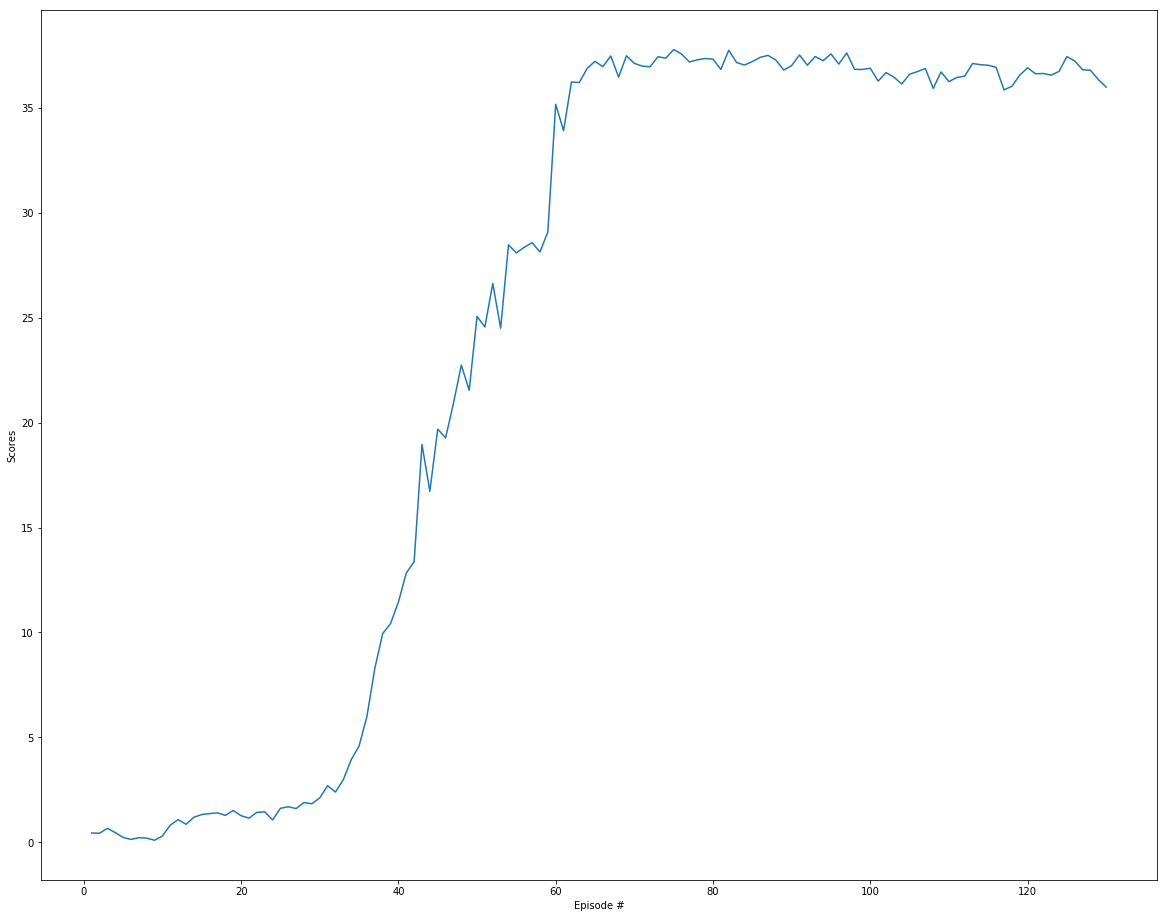

In [11]:
fig = plt.figure(figsize=(20,16))
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Scores')
plt.xlabel('Episode #')

# Overal Result
I managed to get an average score of +30 between the 36 and 60 steps (Depending on the configuration). This by using the Deep Deterministic Policy Gradient Learning implementation.


All the models, hyper-parameters and logs are visible via: [Weights and Biases](https://app.wandb.ai/verbeemen/udacity_deep-reinforcement-learning_project-2?workspace=user-verbeemen).   


### Hyper parameters of the different agents
<table style="width:2000px" class="tableizer-table">
<thead><tr class="tableizer-firstrow"><th style="width:120px"  >Agents</th><th>runtime</th><th>_step</th><th>Average Score</th><th>Mean Score</th><th>ACTION_SIZE</th><th>BATCH_SIZE</th><th>TAU</th><th>BUFFER_SIZE</th><th>GAMMA</th><th>LEARN_INTERVAL</th><th>LEARN_NUM</th><th>LR_ACTOR</th><th>LR_CRITIC</th><th>NUM_AGENTS</th><th>STATE_SIZE</th><th>actor_local</th><th>actor_target</th><th>actor_optimizer</th><th>critic_local</th><th>critic_target</th><th>critic_optimizer</th></tr></thead><tbody>
 <tr><td>ruby-gorge-17</td><td>29m 26s</td><td>129</td><td>31.163</td><td>35.976</td><td>4</td><td>512</td><td>0.0015</td><td>100000</td><td>0.99</td><td>6</td><td>1</td><td>0.001</td><td>0.001</td><td>20</td><td>33</td><td>33-400-300-4</td><td>33-400-300-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td><td>33-400(+4)-300-4</td><td>33-400(+4)-300-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td></tr>
 <tr><td>faithful-elevator-16</td><td>25m 18s</td><td>85</td><td>22.853</td><td>37.115</td><td>4</td><td>512</td><td>0.0015</td><td>100000</td><td>0.99</td><td>6</td><td>2</td><td>0.001</td><td>0.001</td><td>20</td><td>33</td><td>33-400-300-4</td><td>33-400-300-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td><td>33-400(+4)-300-4</td><td>33-400(+4)-300-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td></tr>
 <tr><td>splendid-moon-15</td><td>9m 36s</td><td>32</td><td>0.01198</td><td>0.0035</td><td>4</td><td>512</td><td>0.002</td><td>100000</td><td>0.99</td><td>6</td><td>2</td><td>0.001</td><td>0.001</td><td>20</td><td>33</td><td>33-512-128-4</td><td>33-512-128-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td><td>33-512(+4)-128-4</td><td>33-512(+4)-128-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td></tr>
 <tr><td>breezy-fire-14</td><td>16m 39s</td><td>61</td><td>0.7036</td><td>1.954</td><td>4</td><td>512</td><td>0.001</td><td>100000</td><td>0.99</td><td>4</td><td>1</td><td>0.001</td><td>0.001</td><td>20</td><td>33</td><td>33-384-256-4</td><td>33-384-256-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td><td>33-384(+4)-256-4</td><td>33-384(+4)-256-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td></tr>
 <tr><td>magic-elevator-13</td><td>12m 53s</td><td>56</td><td>0.01293</td><td>0.0065</td><td>4</td><td>512</td><td>0.0015</td><td>100000</td><td>0.99</td><td>8</td><td>1</td><td>0.001</td><td>0.001</td><td>20</td><td>33</td><td>33-512-256-4</td><td>33-512-256-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td><td>33-512(+4)-256-4</td><td>33-512(+4)-256-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td></tr>
 <tr><td>volcanic-hill-12</td><td>27m 11s</td><td>102</td><td>19.732</td><td>37.626</td><td>4</td><td>512</td><td>0.001</td><td>100000</td><td>0.99</td><td>4</td><td>1</td><td>0.001</td><td>0.001</td><td>20</td><td>33</td><td>33-512-256-4</td><td>33-512-256-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td><td>33-512(+4)-256-4</td><td>33-512(+4)-256-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td></tr>
 <tr><td>worthy-violet-8</td><td>36m 39s</td><td>141</td><td>31.319</td><td>36.566</td><td>4</td><td>512</td><td>0.0025</td><td>100000</td><td>0.99</td><td>4</td><td>1</td><td>0.001</td><td>0.001</td><td>20</td><td>33</td><td>33-512-256-4</td><td>33-512-256-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td><td>33-512(+4)-256-4</td><td>33-512(+4)-256-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td></tr>
 <tr><td>kind-sound-7</td><td>11m 5s</td><td>45</td><td>5.749</td><td>20.812</td><td>4</td><td>512</td><td>0.002</td><td>100000</td><td>0.99</td><td>6</td><td>1</td><td>0.001</td><td>0.001</td><td>20</td><td>33</td><td>33-400-300-4</td><td>33-400-300-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td><td>33-400(+4)-300-4</td><td>33-400(+4)-300-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td></tr>
 <tr><td>bright-brook-6</td><td>2m 9s</td><td>8</td><td>0.757</td><td>0.499</td><td>4</td><td>512</td><td>0.002</td><td>100000</td><td>0.99</td><td>6</td><td>1</td><td>0.001</td><td>0.001</td><td>20</td><td>33</td><td>33-400-300-4</td><td>33-400-300-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td><td>33-400(+4)-300-4</td><td>33-400(+4)-300-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td></tr>
 <tr><td>vital-sun-4</td><td>3m 58s</td><td>11</td><td>0.01508</td><td>0.018</td><td>4</td><td>512</td><td>0.001</td><td>100000</td><td>0.99</td><td>6</td><td>2</td><td>0.001</td><td>0.001</td><td>20</td><td>33</td><td>33-512-256-4</td><td>33-512-256-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td><td>33-512(+4)-256-4</td><td>33-512(+4)-256-4</td><td>Adam ( Parameter Group 0 amsgrad: False betas: (0.9, 0.999) eps: 1e-08 lr: 0.001 weight_decay: 0 )</td></tr>
</tbody></table>

### Mean score
![](images/wandb_chart_24-11-2019_15_19_05.png)

### Average score
![](images/WandB_Chart_24-11-2019_16_23_01.png)



# Evaluation
The hyperparameters are very fragile (see the weights and biases report),  
changing them a tiny bit can already immediately make a big difference.  
   
E.g. agent: breezy-fire-14 contains 2 hidden layers with size: 384 - 256  - does not lean  
     agent: volcanic-hill-12 contains 2 hidden layers with size 512 - 256  - does learn well  
    

# Future work
 - Optimize the hyperparameters: E.g. Bayesian optimization.
 - Optimize the network architectures: Both networks are quite shallow at this moment.
 - Try to implement other algorithms as wel, to see if they perform better or not
  - D4PG (might before better then DDPG)
  - A3C
  - PPO